<a href="https://colab.research.google.com/github/xumeiying/Stats_II/blob/master/Stats_II_Probset_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 3 GOV 391L, Spring 2020

In [0]:
# load packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import math 

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
from matplotlib import rc
import seaborn as sns

!pip install stargazer 
from stargazer.stargazer import Stargazer
from IPython.core.display import Latex

from statsmodels.iolib.summary2 import summary_col

mypath = r'/content/drive/My Drive/Colab Notebooks/Stat_II_probsets/'

## Q1

---



Load the `Prestige` data from the `car` package in `R`. (Once you load the package, you can type `data(Prestige)` which will put a data frame called Prestige in your `R` workspace. To see more about its contents, type `?Prestige`.)



### (a) Produce a scatterplot of prestige as a function of its income. Comment briefly about what you see. What does it suggest, at first glance, about the appropriateness of estimating a regression of prestige predicted by income?


The variaces of the model increase as `income` gets larger, suggesting that the uncertainty of the model is not constant. Therefore, the model might not be a good fit, and its R-squared value might be low. The model violate the "zero-conditional mean" assumption probably as a reason of certain key variables are omitted. 


In [0]:
# load data
prestige_data = pd.read_csv(mypath + r"Prestige.csv")
prestige_data

,Unnamed: 0,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof
...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc
99,longshoremen,8.37,4753,0.00,26.1,9313,bc
100,typesetters,10.00,6462,13.58,42.2,9511,bc


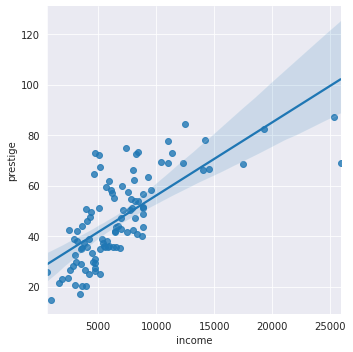

In [0]:
#  scatterplot of prestige as a function of its income
fig_pretige_income = sns.lmplot("income", "prestige", data = prestige_data)
sns.set_style("darkgrid")
fig_pretige_income.savefig(mypath + r"prestige_income.png")

### (b) Create a dummy variable that designates professional jobs as 1 and all other jobs as 0. Estimate a regression predicting prestige as a function of income and whether a job is professional. Present the results of this regression in a table and describe your results in both statistical and substantive terms.

In [0]:
# check categories of the "type" variable
prestige_data["type"].unique()

array(['prof', 'bc', 'wc', nan], dtype=object)

In [0]:
# create dummy variable that designates professional jobs as 1 and all other jobs as 0
is_prof = pd.get_dummies(prestige_data['type'], dummy_na=True)
is_prof.head(70)

,bc,prof,wc,NaN
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
65,1,0,0,0
66,0,0,0,1
67,1,0,0,0
68,1,0,0,0


In [0]:
# Estimate a regression predicting prestige as a function of income and whether a job is professional.
prestige_model1 = smf.ols(formula='prestige ~ income + is_prof["prof"]', data=prestige_data).fit()
print(prestige_model1.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           4.78e-30
Time:                        14:38:01   Log-Likelihood:                -364.88
No. Observations:                 102   AIC:                             735.8
Df Residuals:                      99   BIC:                             743.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.0628      1.677     

### (c) Instead of the professional dummy variable, regress prestige on income and all job types. Explain the operationalization of the job type variable or variables and interpret your results. What does this tell us about the relationship between income and prestige for different types of jobs? How do the results compare to the results in part (b).

`Model (2)` shows that, compared with professional, being a blue collar worker and a white collar worker is associated with 20.1617 and 12.8275 decrease in prestige respectfully. 

In [0]:
# regress prestige on income and all job types
prestige_model2 = smf.ols(formula='prestige ~ income + is_prof["bc"] + is_prof["wc"]', data=prestige_data).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     83.83
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           5.93e-27
Time:                        14:38:03   Log-Likelihood:                -369.59
No. Observations:                 102   AIC:                             747.2
Df Residuals:                      98   BIC:                             757.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        45.3691      2.899     15.648

### (d) Overlay the predicted relationship between income and prestige for professional, white collar and blue collar jobs on the scatterplot in (b), including a legend to describe your labeling. (Note: The end result should be three lines over a single scatterplot.)

<center>

![table 1](https://drive.google.com/uc?id=1mo8ypR9CawX2vNc9kzPVqB73LIXvkn6s)

</center>

`Model (1)` shows that 1 unit increase in `income` results in 0.0015 unit inncrease in `prestige` level. compared with other professionals, being a professional is associated with 22.2298 unit increase in `prestige` level.

The relationship is plotted as follows.


In [0]:
# scatterplot of dummy variables
prestige_data_new = pd.concat([prestige_data, is_prof], axis=1, sort=True)
prestige_data_new

,Unnamed: 0,education,income,women,prestige,census,type,bc,prof,wc,NaN
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof,0,1,0,0
1,general.managers,12.26,25879,4.02,69.1,1130,prof,0,1,0,0
2,accountants,12.77,9271,15.70,63.4,1171,prof,0,1,0,0
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof,0,1,0,0
4,chemists,14.62,8403,11.68,73.5,2111,prof,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc,1,0,0,0
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc,1,0,0,0
99,longshoremen,8.37,4753,0.00,26.1,9313,bc,1,0,0,0
100,typesetters,10.00,6462,13.58,42.2,9511,bc,1,0,0,0


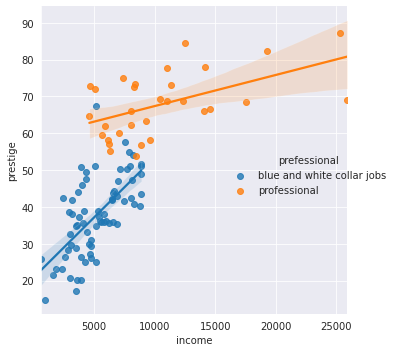

In [0]:
fig_pretige_prof = sns.lmplot("income", "prestige", hue = "prof", legend=True, data = prestige_data_new)
new_title = 'prefessional'
fig_pretige_prof._legend.set_title(new_title)
new_labels=("blue and white collar jobs", "professional")
for t, l in zip(fig_pretige_prof._legend.texts, new_labels): t.set_text(l)
fig_pretige_prof.savefig(mypath + r"fig_pretige_prof")

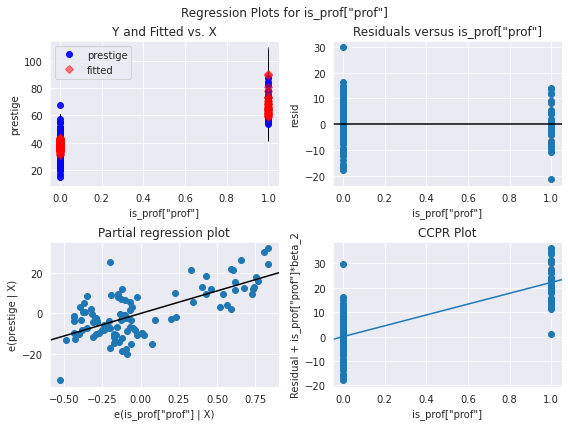

In [0]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(prestige_model1, 'is_prof["prof"]', fig = fig)
plt.show()


#### (e) What are the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of \$5000,  \$10000, and $15000?

From `Model (2)` we can construct a model of prestige expressed by 
$$presdige = 45.3691 + 0.0019 * income - 20.1617 * bc - 12.8275 * wc $$

For example, the prestige level for a professional with \$5000 income is calculated as
$$prestige = 45.3691 + 0.0019 * 5000 - 20.1617 * 0 - 12.8275 * 0 =  54.8691 $$

The prestige level for a white collar worker with \$5000 income is calculated as
$$prestige = 45.3691 + 0.0019 * 5000 - 20.1617 * 0 - 12.8275 * 1 =  42.0416 $$ 

The prestige level for a blue collar worker with \$5000 income is calculated as
$$prestige = 45.3691 + 0.0019 * 5000 - 20.1617 * 1 - 12.8275 * 0 =  34.7074 $$ 

We can calculate the predicted prestige levels for different professionals with \$10000 income and \\$15000 income in this way. 

In summary, 
- the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of \$5000 is 54.8691 , 42.0416 , and 34.7074 respectively;
- the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of \$10000 is 64.3691 , 51.5416 , and 44.2074 respectively;
- the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of \$15000 is 73.8691 , 61.0416 , and 53.7074 respectively.


In [0]:
# create model summary in Latex
prestige_result1 = Stargazer([prestige_model1, prestige_model2, prestige_model3])
Latex(prestige_result1.render_latex())

<IPython.core.display.Latex object>

In [0]:
# predict prestige level
def prestige (income,is_bc, is_wc):
    prestige = 45.3691 + 0.0019 * income - 20.1617 * is_bc - 12.8275 * is_wc
    return round(prestige,4)

print("the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of $5000 is \n",
      prestige(5000, 0, 0), ",", prestige(5000, 0, 1), ", and", prestige(5000, 1, 0), "respectively")
print("\n the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of $10000 is \n",
      prestige(10000, 0, 0), ",", prestige(10000, 0, 1), ", and", prestige(10000, 1, 0), "respectively")
print("\n the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of $15000 is \n",
      prestige(15000, 0, 0), ",", prestige(15000, 0, 1), ", and", prestige(15000, 1, 0), "respectively")

the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of $5000 is 
 54.8691 , 42.0416 , and 34.7074 respectively

 the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of $10000 is 
 64.3691 , 51.5416 , and 44.2074 respectively

 the predicted prestige levels for professional, white collar, and blue collar occupations with average incomes of $15000 is 
 73.8691 , 61.0416 , and 53.7074 respectively


In [0]:
# Regress prestige on education, income, and job type
prestige_model3 = smf.ols(formula='prestige ~ education + income + is_prof["bc"] + is_prof["wc"]', data=prestige_data).fit()
print(prestige_model3.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     105.0
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           2.29e-34
Time:                        14:38:04   Log-Likelihood:                -349.09
No. Observations:                 102   AIC:                             708.2
Df Residuals:                      97   BIC:                             721.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7757      7.076     -0.110

## Q2
Still using the `Prestige` data...


#### (a) Regress `prestige` on `education`, `income`, and `job type`. Describe your results in statistical and substantive terms.

<center>

![table 1](https://drive.google.com/uc?id=1mo8ypR9CawX2vNc9kzPVqB73LIXvkn6s)

</center>

`Model (3)` suggest that 
- 1 unit increase in `education` leve is associated with 3.6732 unit increase in the `prestige` level; 
- 1 unit increase in `income` leve is associated with 0.001 unit increase in the `prestige` level; 
- compared with professionals, being a blue collar worker results in 2.96 decrease in the `prestige` level; 
- compared with professionals, being a white collar worker results in 6.3118 decrease in the `prestige` level.

In [0]:
# construct new prestige variable
noise1 = np.random.normal(0, 1, 102)
noise2 = np.random.normal(0, 1, 102)
noise3 = np.random.normal(0, 10, 102)
n1 = np.array(prestige_data["prestige"])+ noise1
n2 = np.array(prestige_data["prestige"])+ noise2
n3 = np.array(prestige_data["prestige"])+ noise3
prestige1 = pd.DataFrame(n1, columns = ["prestige1"])
prestige2 = pd.DataFrame(n2, columns = ["prestige2"])
prestige3 = pd.DataFrame(n3, columns = ["prestige3"])
prestige_data_new2 = pd.concat([prestige_data, prestige1, prestige2, prestige3], axis=1, )
prestige_data_new2

,Unnamed: 0,education,income,women,prestige,census,type,prestige1,prestige2,prestige3
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof,68.327227,70.123853,96.477833
1,general.managers,12.26,25879,4.02,69.1,1130,prof,67.830063,68.921563,75.697081
2,accountants,12.77,9271,15.70,63.4,1171,prof,62.949321,63.099767,61.348619
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof,56.831487,58.034867,78.035282
4,chemists,14.62,8403,11.68,73.5,2111,prof,74.364190,74.079520,94.332462
...,...,...,...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc,36.534326,36.416732,36.735403
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc,24.795856,24.031656,30.308321
99,longshoremen,8.37,4753,0.00,26.1,9313,bc,25.276668,26.711689,37.755765
100,typesetters,10.00,6462,13.58,42.2,9511,bc,42.767071,41.205891,31.767933


In [0]:
# Regress with errors
prestige_model4 = smf.ols(formula='prestige1 ~ education + income + is_prof["bc"] + is_prof["wc"]', data=prestige_data_new2).fit()
# print(prestige_model4.summary())

prestige_model5 = smf.ols(formula='prestige2 ~ education + income + is_prof["bc"] + is_prof["wc"]', data=prestige_data_new2).fit()
# print("\n", prestige_model5.summary())

prestige_model6 = smf.ols(formula='prestige3 ~ education + income + is_prof["bc"] + is_prof["wc"]', data=prestige_data_new2).fit()
# print("\n", prestige_model6.summary())

prestige_sum1 = summary_col([prestige_model1, prestige_model2, prestige_model3], stars=True, float_format='%0.3f',
                  model_names=['Model\n(1)', 'Model\n(2)', 'Model\n(3)'], 
                  info_dict={'No. Observations':lambda x: "{0:d}".format(int(x.nobs)),
                             'R^2':lambda x: "{:.2f}".format(x.rsquared),
                             'adjusted R^2': lambda x: "{:.2f}".format(x.rsquared_adj),
                             'Residual Std. Errors': lambda x: "{:.3f}".format(x.mse_resid), 
                             'F-statistics': lambda x: "{:.3f}".format(x.f_pvalue),
                             'df': lambda x: "{:.1f}".format(x.df_model)})
print("Regressing prestige against education, income and job type", prestige_sum1)

Regressing prestige against education, income and job type 
                       Model     Model     Model  
                        (1)       (2)       (3)   
--------------------------------------------------
Intercept            30.063*** 45.369***  -0.776  
                     (1.677)   (2.899)    (7.076) 
education                                 3.926***
                                          (0.567) 
income               0.001***  0.002***   0.001***
                     (0.000)   (0.000)    (0.000) 
is_prof["bc"]                  -20.162*** -2.960  
                               (2.363)    (3.153) 
is_prof["prof"]      22.230***                    
                     (2.339)                      
is_prof["wc"]                  -12.827*** -6.312**
                               (2.746)    (2.446) 
No. Observations     102       102        102     
R^2                  0.74      0.72       0.81    
adjusted R^2         0.74      0.71       0.80    
Residual Std. Errors 7

#### (b) What would you expect to happen to your estimates if you could only measure prestige with some error so that your measure of prestige was equal to the true value of prestige plus some random normal noise that has mean zero and variance $\sigma^2_{y}$?

If the measure of prestige was equal to the true value of prestige plus some random normal noise that has mean zero and variance $\sigma^2_{y}$, then the true level of `prestige` $y^{*}$

$ prestige^{*} = prestige + y$, where $y \sim N(0, \sigma^2_{y}) $

The true model is $$prestige = \beta_{0} + \beta_{1}X + \epsilon$$
But we fit

\begin{equation}
\begin{aligned}
prestige^{*} =  \beta_{0} + \beta_{1}X + \epsilon \\ prestige + y = \beta_{0} + \beta_{1}X + \epsilon \\ prestige = \beta_{0} + \beta_{1}X + \epsilon - y
\end{aligned}
\end{equation}

Since $\epsilon - y \sim N(0, \sigma^2_{\epsilon} + \sigma^2_{y})$, our regression model is still _BLUE_, but the uncertainty increases, and the variance is now $(\sigma^2_{\epsilon} + \sigma^2_{y})(X\prime X)^{-1}$.

#### (c )Construct a new prestige variable that is equal to the original prestige variable plus a vector of length `n` drawn from a standard normal distribution. Regress this new prestige variable on education, income, and job type. Repeat this process (both creating the noisy measure and running the regression) two more times, looking at the coefficient estimates and standard errors of each one and comparing them to the “no error” regression you ran in part a. Discuss what happens to these quantities.


In [0]:
# errors in education variable 
noise1 = np.random.normal(0, 1, 102)
noise3 = np.random.normal(0, 10, 102)
e1 = np.array(prestige_data["education"])+ noise1
e2 = np.array(prestige_data["education"])+ noise3
education1 = pd.DataFrame(e1, columns = ["education1"])
education2 = pd.DataFrame(e2, columns = ["education2"])
prestige_data_new3 = pd.concat([prestige_data, education1, education2], axis=1, )
prestige_data_new3

,Unnamed: 0,education,income,women,prestige,census,type,education1,education2
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof,13.345628,22.157147
1,general.managers,12.26,25879,4.02,69.1,1130,prof,11.380634,18.738085
2,accountants,12.77,9271,15.70,63.4,1171,prof,12.306258,18.055090
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof,12.027529,27.340810
4,chemists,14.62,8403,11.68,73.5,2111,prof,15.361771,10.703746
...,...,...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc,7.537854,5.474299
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc,8.045297,8.560001
99,longshoremen,8.37,4753,0.00,26.1,9313,bc,8.565339,6.390146
100,typesetters,10.00,6462,13.58,42.2,9511,bc,9.967994,-0.665320



### (d) Create another new measure of prestige with noise drawn from $N ∼ (0, 10)$. Reestimate the model regressing prestige on education, income, and job type with this new measure. Discuss what happens to your results and explain why.


|indicators|model(3)|model(4)|model(5)|model(6)|
|---------:|:------:|:------:|:------:|:------:|
|intercept|-0.776$^{}$ |0.549$^{}$|-0.993$^{}$ |2.835$^{}$|
||(7.076)|(6.878)|(7.175) |(12.231)|
|education|3.926$^{***}$|3.798$^{***}$| 3.939$^{***}$| 3.77$^{***}$ |
| |(0.567)|(0.551)|(0.575)| (0.98) |
|income|0.001$^{***}$ | 0.001$^{***}$| 0.001$^{***}$ | 0.001$^{***}$|
|| (0.0)|(0.0) |(0.0) |(0.0)|
|bc|-2.96$^{}$ |-3.31$^{}$ |-2.533$^{}$|-7.265$^{}$|
||(3.153)|(3.065)|(3.198)|(5.45)|
|wc|-6.312$^{**}$  |-6.576$^{***}$ |-6.064$^{**}$ | -8.557$^{**}$|
||(2.446)|(2.378) |(2.481)|(4.228) |
|Observations|102|102|102|102|
|$R^{2}$|0.812|0.82 |0.804 |0.622 |
|Adjusted $R^{2}$|0.805|0.813|0.796 | 0.606|
|Residual Std. Error|7.604 |7.392|7.711 |13.144 |
||(df = 97.0)|(df = 97.0)|(df = 97.0)|(df = 97.0)
|F-statistics|105.006$^{***}$  |110.429$^{***}$ |99.349$^{***}$| 39.826$^{***}$ |
||(df = 4.0; 97.0)|(df = 4.0; 97.0)|(df = 4.0; 97.0)|(df = 4.0; 97.0)

Compared with `model(3)`, `model(4)` and `model(5)` produces very similar results in all indicators: none of reported statistics for intercetp, coefficients, $R^{2}$, adjusted $R^{2}$, or F-statistics varies significantly. This suggest that small measurement errors in the y variable will not result in statisically significant bias in regression models. 

Instead, `model (6)` produces smaller $R^{2}$ (0.62) and adjusted $R^{2}$ (0.60), statistically significant intercept and coefficient estimates. The model remains BLUE and statistically significant, but uncertainly rises. This suggest that large measurement errors in the y variabe will result in less certain regression estimates. 

#### (e) What would you expect to happen to your estimates if you could only measure education with some error so that your measure of education was equal to the true education level plus some random normal noise that has mean zero and variance $\sigma^2_{y}$?


If error is introduced in the X variables,  measure of prestige was equal to the true value of prestige plus some random normal noise that has mean zero and variance $\sigma^2_{y}$, then the true level of `prestige` $y^{*}$

$ education^{*} = education + x$, where $x \sim N(0, \sigma^2_{x}) $

The true model is $$Y = \beta_{0} + \beta_{1}X + \beta_{2} education + \epsilon$$
But we fit

\begin{equation}
\begin{aligned}
prestige^{*} =  \beta_{0} + \beta_{1}X^{*} + \beta_{2} education^{*} \epsilon \\ prestige = \beta_{0} + \beta_{1}(X) + \beta_{2} (education +x)  + \epsilon \\ prestige = \beta_{0} + \beta_{1}X + \beta_{2}education + \beta_{2}x + \epsilon 
\end{aligned}
\end{equation}

Our new model error is $\beta_{2}x + \epsilon$, and is correlated with $education$ because $education = education^{*} - x $. This will result in a violation of the "independent error" assumption, and our regression model is _no longer BLUE_. The degree and direction of the bias depend on $Cov(X, education), \beta_{2}$, and $\frac{\sigma^2_{x}}{\sigma^2_{X}+\sigma^2_{x}}$.

#### (f) Do an informal test of your answer in e following an analogous procedure to that used in c and d above, this time creating “noisy” versions of the education variable with standard deviation 1 and 10 and comment on what happens under each scenario. Be sure to include all of the covariates in your discussion.

<center>

![table 2](https://drive.google.com/uc?id=1XjS0uZAfCUYWZDagt6j3M8WhNafMYKs-)

</center>


`Model (7)` introduces small errors in `education` where $x \sim N(0, 1) $. Noting that `education` is positively correlated with both `income` but negatively correlated with `job type`. This leads to a negative bias in the `education` coefficient. All other intercepts and coefficients changed, and the $R^{2}$, adjusted $R^{2}$, or F-statistics drops. 

 `Model (8)` introduces larger errors in `education` where $x \sim N(0, 10) $. In this scenario, we end up with an even larger negative bias in the `education` coefficient compared with `model 3`.



In [0]:
prestige_model7 = smf.ols(formula='prestige ~ education1 + income + is_prof["bc"] + is_prof["wc"]', data=prestige_data_new3).fit()

prestige_model8 = smf.ols(formula='prestige ~ education2 + income + is_prof["bc"] + is_prof["wc"]', data=prestige_data_new3).fit()

prestige_sum2 = summary_col([prestige_model3, prestige_model7, prestige_model8], stars=True, float_format='%0.3f',
                  model_names=['Model\n(3)', 'Model\n(7)', 'Model\n(8)'], 
                  info_dict={'No. Observations':lambda x: "{0:d}".format(int(x.nobs)),
                             'R^2':lambda x: "{:.2f}".format(x.rsquared),
                             'adjusted R^2': lambda x: "{:.2f}".format(x.rsquared_adj),
                             'Residual Std. Errors': lambda x: "{:.3f}".format(x.mse_resid), 
                             'F-statistics': lambda x: "{:.3f}".format(x.f_pvalue),
                             'df': lambda x: "{:.1f}".format(x.df_model)})
print(prestige_sum2)


                      Model     Model     Model   
                       (3)       (7)       (8)    
--------------------------------------------------
Intercept            -0.776   10.397*   46.821*** 
                     (7.076)  (6.031)   (3.053)   
education            3.926***                     
                     (0.567)                      
education1                    2.873***            
                              (0.453)             
education2                              -0.141    
                                        (0.098)   
income               0.001*** 0.001***  0.002***  
                     (0.000)  (0.000)   (0.000)   
is_prof["bc"]        -2.960   -7.240**  -21.119***
                     (3.153)  (2.852)   (2.442)   
is_prof["wc"]        -6.312** -7.022*** -12.600***
                     (2.446)  (2.494)   (2.736)   
No. Observations     102      102       102       
R^2                  0.81     0.80      0.73      
adjusted R^2         0.80     

In [0]:
prestige_result5 = Stargazer([prestige_model3, prestige_model7, prestige_model8])
Latex(prestige_result5.render_latex())

<IPython.core.display.Latex object>

## Q3


---


Load the `Caschool.csv` data uploaded to Canvas


#### (a) You are tasked with developing a model that predicts student test scores (`testscr`). Your intern comes to you with a model regressing test scores on the percentage of students receiving reduced price meals (`mealpct`), the number of computers per student (`compstu`), spending per student (`expnstu`), the student teacher ratio (`str`) and average district income (`avginc`). Estimate this model. Briefly summarize the results.

<center>

![table 3](https://drive.google.com/uc?id=1OjKLiTtprgxHUNrdC1dXG8eKEPmWyFAf)
</center>

`model (1)` shows that
- with no other treatment, student test score is predicted as 666.4008 on average;
- 1 percent point increase in students receiving reduced price meals results in .5092 point decrease in student test score on average; it is statistically significant at 0.001 level; 
- 1 dollar increase in average district income results in 0.4745 points increase in student test scores on average; it is statistically significant at 0.001 level;
- every 1 extra computer a student have results in 18.2893 points increase in student test scores on average; it is statistically significant at 0.05 level

Imoact of spending per student and student teacher ratio on student test score is ambiguous. Both coefficients are not statistically significant and contain zero in their conficance intervals.  

In total, `model (1)` explains 79% of variations in student test score, 

In [0]:
caschool_data = pd.read_csv(mypath + r"Caschool.csv")
caschool_data.describe()

,Unnamed: 0,distcod,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,210.500000,67472.809524,2628.792857,129.067376,13.246042,44.705237,303.383333,654.156548,0.135927,5312.407541,19.640425,15.316588,15.768155,654.970477,653.342619
std,121.387808,3466.994655,3913.104985,187.912679,11.454821,27.123381,441.341298,19.053348,0.064956,633.937053,1.891812,7.225890,18.285927,20.107980,18.754202
min,1.000000,61382.000000,81.000000,4.850000,0.000000,0.000000,0.000000,605.550049,0.000000,3926.069580,14.000000,5.335000,0.000000,604.500000,605.400024
25%,105.750000,64307.750000,379.000000,19.662499,4.395375,23.282200,46.000000,640.049988,0.093767,4906.180054,18.582360,10.639000,1.940807,640.400024,639.375015
50%,210.500000,67760.500000,950.500000,48.564999,10.520450,41.750700,117.500000,654.449982,0.125464,5214.516602,19.723208,13.727800,8.777634,655.750000,652.449982
75%,315.250000,70419.000000,3008.000000,146.350002,18.981350,66.864725,375.250000,666.662506,0.164466,5601.401367,20.871815,17.629001,22.970003,668.725006,665.849991
max,420.000000,75440.000000,27176.000000,1429.000000,78.994202,100.000000,3324.000000,706.750000,0.420833,7711.506836,25.799999,55.327999,85.539719,704.000000,709.500000


In [0]:
caschool_model1 = smf.ols(formula = "testscr ~ mealpct + compstu + expnstu + str + avginc", data=caschool_data).fit()
print(caschool_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     316.6
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          5.67e-139
Time:                        14:38:06   Log-Likelihood:                -1502.9
No. Observations:                 420   AIC:                             3018.
Df Residuals:                     414   BIC:                             3042.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    666.4008      9.298     71.675      0.0

#### (b) Plot each of your IVs against your DV. Based on these plots, how do you feel about the model? Are the results consistent with patterns in the data? Do you see any red flags?


For the average district income (`avginc`), it seems that the actual relationship with `testscr` is not linear. 

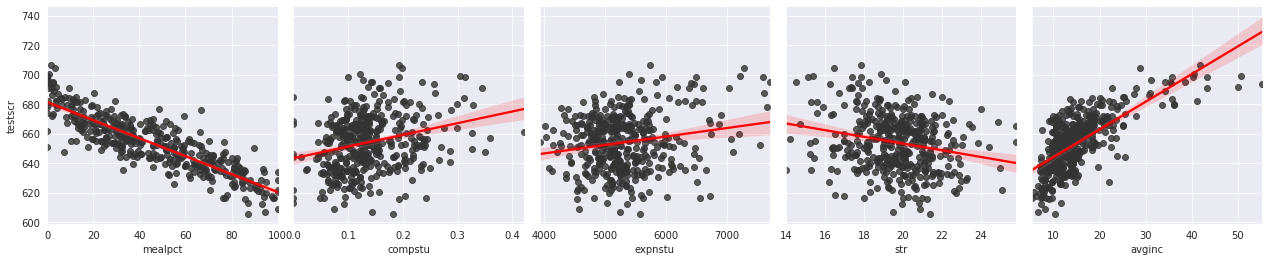

In [0]:
caschool_g = sns.PairGrid(caschool_data, y_vars=["testscr"], x_vars=["mealpct", "compstu", "expnstu", "str","avginc"], height=3.5)
caschool_g.map(sns.regplot, color="0.2", line_kws={'color':'red'})
sns.set_style("darkgrid")
plt.show
caschool_g.savefig(mypath + r"caschool_g.png")

In [0]:
caschool_result = Stargazer([caschool_model1])
Latex(caschool_result.render_latex())

<IPython.core.display.Latex object>

#### (c) Calculate the condition number of the $X$ matrix and assess the results.

The “condition number” $\kappa$ of the matrix gives us an indication of correlation within the $X$ matrix as a whole.

<br>

$$\kappa = \sqrt \frac{Maximum \ Eigenvalue \ in \ X}{Minimum \ Eigenvalue \ in \ X}$$

To calculate the conditional number, I first construct the correlation matrix of my x variables

<br>

\begin{equation}
corr(X) =  
\begin{bmatrix}
1 & -0.20395342 & -0.06103871  & 0.1352034 &  -0.68443962\\
-0.20395342 & 1 & 0.28655958 & -0.30707021 & 0.19480622\\
-0.06103871 & 0.28655958 & 1 & -0.61998215 & 0.31448448 \\
0.1352034 &  -0.30707021 & -0.61998215 &  1 & -0.23219373\\
-0.68443962 & 0.19480622 & 0.31448448 & -0.23219373  &1 
\end{bmatrix}
\end{equation}

<br>

Then, I calculated the eigenvalues 

<br>

\begin{equation}
eigenvalues(corr(X)) =  
\begin{bmatrix}
 2.23151176 & 1.31368648 & 0.24327847 & 0.42038989 & 0.7911334
\end{bmatrix}
\end{equation}

<br>

Finally, the conditioanl number is calculated as 

<br>

$$\kappa = \sqrt \frac{2.23151176}{0.24327847} = 3.028640684475708 < 15$$

The relative size of the eigenvalues is a measure of that instability. A large condition number indicates that relatively small changes in the data tend to produce large changes in our estimates. If there is no collinearity at all in X , the eigenvalues and therefore condition number will equal 1.

The result suggest that the multicollinearity of our `model(1)` is below the critical value of $\kappa = 15$. Therefore,  multicollinearity should not be a concern. 

In [0]:
# construct correlation matrix 
x_vars = caschool_data[["mealpct","compstu", "expnstu", "str", "avginc"]]
print (x_vars.corr(), "\n")

corx = x_vars.corr().values
print("correlation matrix \n", corx)

# call conditional number
from numpy import linalg as LA
codnum = LA.cond(corx)
print("\n conditional number \n", codnum)

# or calculate by hand
print("\n =====================calculation by hand========================== ")

# calculate eigenvalues
w, v = LA.eig(corx)
print("\n eigenvalues \n", w)
print("\n eigenvectors \n", v)

# calculate conditional number by hand
codnum_h = math.sqrt(2.23151176/0.24327847)
print("\n take square root, the conditional number is calculated as \n", codnum_h)

          mealpct   compstu   expnstu       str    avginc
mealpct  1.000000 -0.203953 -0.061039  0.135203 -0.684440
compstu -0.203953  1.000000  0.286560 -0.307070  0.194806
expnstu -0.061039  0.286560  1.000000 -0.619982  0.314484
str      0.135203 -0.307070 -0.619982  1.000000 -0.232194
avginc  -0.684440  0.194806  0.314484 -0.232194  1.000000 

correlation matrix 
 [[ 1.         -0.20395342 -0.06103871  0.1352034  -0.68443962]
 [-0.20395342  1.          0.28655958 -0.30707021  0.19480622]
 [-0.06103871  0.28655958  1.         -0.61998215  0.31448448]
 [ 0.1352034  -0.30707021 -0.61998215  1.         -0.23219373]
 [-0.68443962  0.19480622  0.31448448 -0.23219373  1.        ]]

 conditional number 
 9.172664533637649

 =====================calculation by hand========================== 

 eigenvalues 
 [2.23151176 1.31368648 0.24327847 0.42038989 0.7911334 ]

 eigenvectors 
 [[-0.41327846  0.60980383  0.59173081 -0.32697353  0.01682721]
 [ 0.37373639  0.16188608  0.06439677 -0.10052587

#### (d) Calculate the variance inflation factor for each of the variables in X and assess the results.

Variance Inflation Factor tells us how much the variance of βˆk is increased due to collinearity. It is defined as
$$VIF_{k} = \frac{1}{1-R^{2}} = \frac{1}{1-0.793} = 4.830917874396136 $$

The number is less than 10, also indicating that colinearity is not a concern. 

In [0]:
# calculate variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# statsmodels.stats.outliers_influence.variance_inflation_factor()

vif_h = 1/(1-0.793)
print("\n the variance_inflation_factor is calculated as \n", vif_h)


 the variance_inflation_factor is calculated as 
 4.830917874396136





#### (e) Given these results, would you revise your intern’s model? If so, how? Justify your choices. (You are welcome to use other variables in the dataset, but unfortunately your intern lost the codebook.)

The `avginc` variable has is skewed to the left; therefore I logged it and created a new variable `avginc_log` to improve the model.




<function matplotlib.pyplot.show>

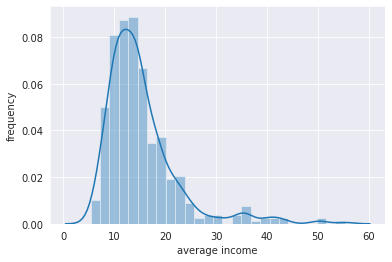

In [0]:
# diagnositics 
# plot income
income_f = sns.distplot(caschool_data[["avginc"]])
income_f.set(xlabel="average income", ylabel="frequency")
plt.show

<function matplotlib.pyplot.show>

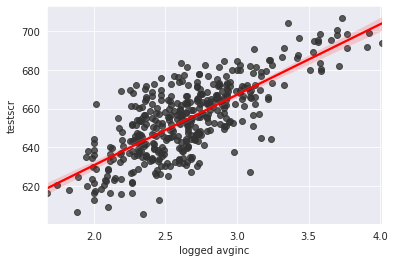

In [0]:
# log income
avginc_log = np.log(caschool_data[["avginc"]].values)
log_plot = sns.regplot(avginc_log, caschool_data["testscr"], color="0.2", 
                       line_kws={'color':'red'})
log_plot.set(xlabel="logged avginc")
plt.show

In [0]:
# rebuild model
caschool_model2 = smf.ols(formula = "testscr ~ mealpct + compstu + expnstu + str + avginc_log", data=caschool_data).fit()
print(caschool_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     308.5
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          3.80e-137
Time:                        14:38:12   Log-Likelihood:                -1507.1
No. Observations:                 420   AIC:                             3026.
Df Residuals:                     414   BIC:                             3051.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.9410     10.146     64.059      0.0

In [0]:
from statsmodels.iolib.summary2 import summary_col
caschool_sum = summary_col([caschool_model1, caschool_model2], stars=True, float_format='%0.3f',
                  model_names=['Model\n(1)', 'Model\n(2)'], 
                  info_dict={'No. Observations':lambda x: "{0:d}".format(int(x.nobs)),
                             'R^2':lambda x: "{:.2f}".format(x.rsquared),
                             'adjusted R^2': lambda x: "{:.2f}".format(x.rsquared_adj),
                             'Residual Std. Errors': lambda x: "{:.3f}".format(x.mse_resid), 
                             'F-statistics': lambda x: "{:.3f}".format(x.f_pvalue),
                             'df': lambda x: "{:.1f}".format(x.df_model)})
print(caschool_sum)


                       Model      Model   
                        (1)        (2)    
------------------------------------------
Intercept            666.401*** 649.941***
                     (9.298)    (10.146)  
avginc               0.474***             
                     (0.087)              
avginc_log                      8.178***  
                                (1.806)   
compstu              18.268**   19.977*** 
                     (7.070)    (7.163)   
expnstu              0.002      0.002**   
                     (0.001)    (0.001)   
mealpct              -0.509***  -0.504*** 
                     (0.023)    (0.026)   
str                  -0.367     -0.383    
                     (0.293)    (0.297)   
No. Observations     420        420       
R^2                  0.79       0.79      
adjusted R^2         0.79       0.79      
Residual Std. Errors 76.177     77.743    
F-statistics         0.000      0.000     
df                   5.0        5.0       
Standard e

## Q4

---


Still using the `Caschool.csv` data...

### (a) Now your boss wants you to develop a model that predicts student expenditures (`enrltot`). Regress student expenditures on average district income (`avginc`), percentage of students receiving reduced price meals (`mealpct`), reading scores (`readscr`) and math scores (`mathscr`).


|Dependent Variable|enrltot|
|--:|:--|
|Intercept|   4.931e+04 $^{***}$|
||   1.38e+04| 
|avginc|       145.6428 $^{***}$|
||     36.664|      
|mealpct|       -8.4667 |
||    14.394| 
|readscr |    -140.6311$^{***}$ |
||    28.107 |
|mathscr |      66.6955 $^{**}$ |
||   25.757 |
|No. Observations| 420|
|R-squared|              0.092|
|F-statistic|11.62|


In [0]:
caschool_model2 = smf.ols(formula = "enrltot ~ avginc + mealpct + readscr + mathscr", data=caschool_data).fit()
print(caschool_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                enrltot   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.62
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           5.90e-09
Time:                        14:38:12   Log-Likelihood:                -4047.4
No. Observations:                 420   AIC:                             8105.
Df Residuals:                     415   BIC:                             8125.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.931e+04   1.38e+04      3.573      0.0

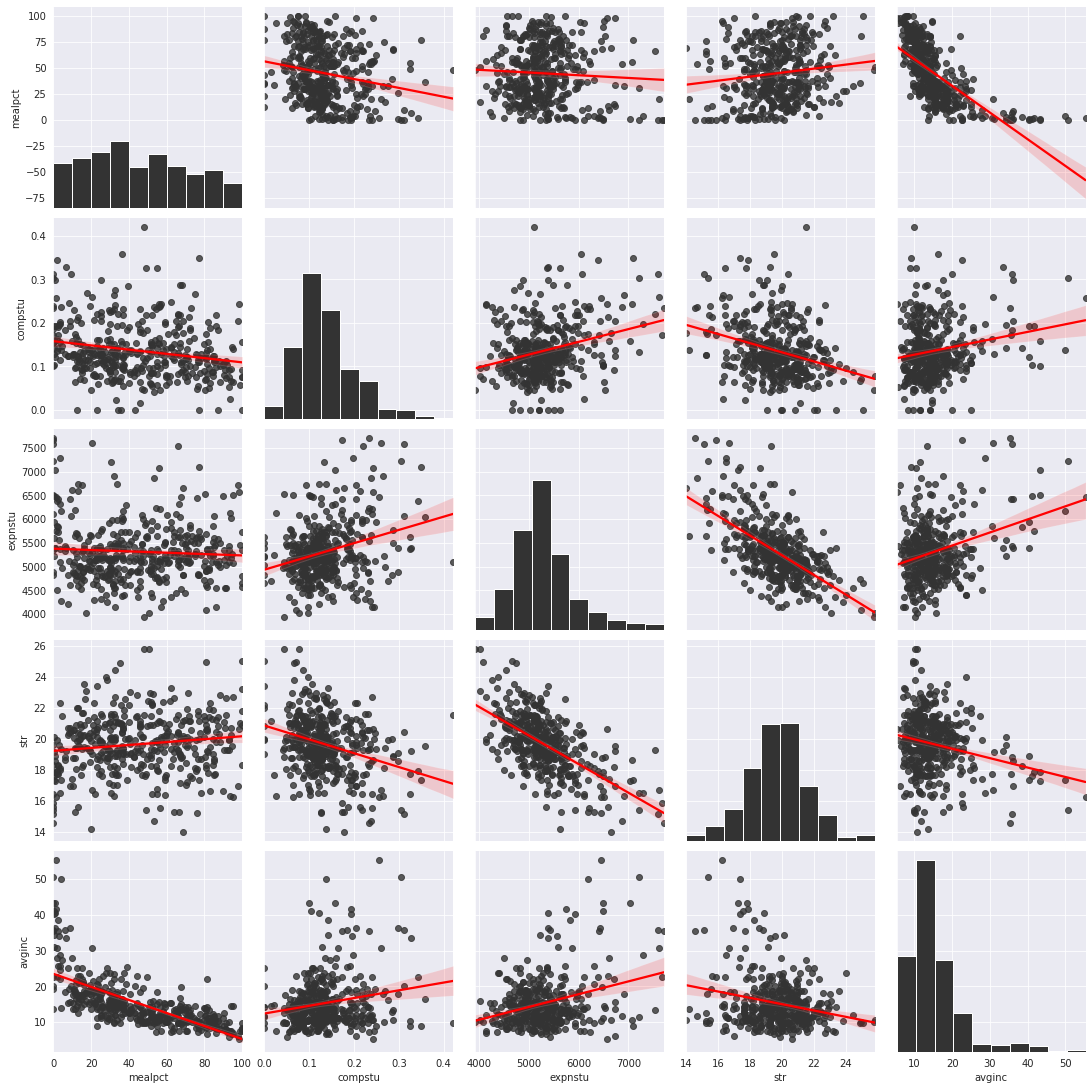

In [0]:
# plot colinearity
caschool_coli = sns.PairGrid(caschool_data, vars=["mealpct", "compstu", "expnstu", "str","avginc"], height=3)
sns.set_style("darkgrid")
caschool_coli.map_offdiag(sns.regplot, color="0.2", line_kws={'color':'red'})
caschool_coli.map_diag(plt.hist, color="0.2", edgecolor="w")

### (b) Conduct an F-test of the overall significance of your model (yes, R reports this, but I want you to calculate it) and interpret the results.


The F-statistics of `model(2)` is 11.656.

In [0]:
# calculate F-statistics
def F_test(R_squared, n, k):
    F_test = (R_squared / k) / ((1- R_squared)/(n - k - 1))
    return (F_test)

print("the F-statistics of overall significance is", F_test(0.101, 420, 4))

the F-statistics of overall significance is 11.656006674082315


### (c) Construct the hypothesis matrix (both $R$ and $c$) to test whether the coefficients on district income and reduced price meals are both equal to zero.

### (d) Calculate the F-statistic and interpret your results.
The true model
$$enrltot = \beta_{0} + \beta_{1}avginc + \beta_{2}mealpct + \beta_{3}readscr+ \beta_{4}mathscr + \epsilon$$
The null hypothesis against the alternative hypothesis we want to test is writen as
$$H_{0}: r_{1}\beta_{1} = r_{2}\beta_{2} $$
$$H_{A}: r_{1}\beta_{1} \neq r_{2}\beta_{2}  $$
Or simply in matrix form, 
$$H_{0}: R\beta =  c $$
$$H_{A}: R\beta  \neq c $$
I fisrt constructed 
\begin{equation}
R = 
\begin{bmatrix}
0 & 1 & 0 & 0& 0 \\
0 & 0 & 1 & 0& 0 
\end{bmatrix}
\end{equation}
and 
\begin{equation}
\beta = 
\begin{bmatrix}
4.931e+04 \\
145.6248\\
-8.4667\\
-140.6133\\
66.6955
\end{bmatrix}
\end{equation}
and 
\begin{equation}
c = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}
\end{equation}

We test
$$H_{0}: R\beta -  c = 0$$
$$H_{A}: R\beta - c \neq 0 $$

F-statistics is calculated by 
$$F= \frac{(R\beta - c)\prime [R(X\prime X)^{-1} R\prime]^{-1} (R\beta - c)}{q \hat \sigma^2}, where \ \hat \sigma^2 = \frac{e\prime e}{(n-k-1)}$$

We calculated 
$F = 8.8816$, and $F_{2, \ 415} =  3.0175$

Since $F > F_{2, \ 415}$, we reject the null hypothesis that $\beta_{1} = \beta_{2}$. If average district income (`avginc`) and reduced price meals (`mealpct`) were measured on the same scale we would conclude that they do not have equal influence on studentexpenditures (`enrltot`).

In [0]:
# joint hypothesis testing in matrix form
# make sure to convert array to matrix so that the multiplication operation will not trigger the broadcast mechanism
R1 = np.mat(np.array([[0, 1, 0, 0, 0],
                      [0, 0, 1, 0, 0]]))
c1 = np.mat(np.array([[0],
                     [0]]))
beta = np.mat(np.array([[4.931e+04],
                 [145.6248],
                 [-8.4667],
                 [-140.6311],
                 [66.6955]]))

# X matrix includes intercept
intercept = np.ones((420, 1))
X = np.mat(np.concatenate((intercept, caschool_data[["avginc", "mealpct","readscr", "mathscr"]]), axis=1))
X_prime_X_inverse = np.linalg.inv(X.T * X) 

# redisuals
e = np.mat(caschool_data[["enrltot"]].values - np.reshape(caschool_model2.predict(), (420, 1)))
def sigma_square(e, n, k): 
    sigma_square = (e.T * e) / (n - k - 1)
    return sigma_square
sigma_square = sigma_square(e, 420, 4)  # or sigma_square = (e.T * e) / (420 - 4 - 1)

# calculate F-statistics
from scipy.stats import f
q1 = 2
F1 = ((R1*beta - c1).T * np.linalg.inv(R1 * X_prime_X_inverse * R1.T) * (R1*beta - c1))/(q1 * sigma_square)
print("first F_statistics = ", F1)

#get the critical value of F
f_critical = f.ppf(q=0.95, dfn=2, dfd=415) 
print("\n f_critical = ", f_critical)

first F_statistics =  [[8.8816191]]

 f_critical =  3.017461808104464



### (e) Construct the hypothesis matrix to test whether the coefficients on reading scores and math scores are equal to each other.

### (f) Calculate the F-statistic and interpret your results.
$$enrltot = \beta_{0} + \beta{1}avginc + \beta_{2}mealpct + \beta{3}readscr+ \beta{4}mathscr + \epsilon$$
Significance of a Regression is calculated as 
$$F = \frac{R^{2}/k}{(1-R^{2})/(n-k-1)}$$
The true model
$$enrltot = \beta_{0} + \beta_{1}avginc + \beta_{2}mealpct + \beta_{3}readscr+ \beta_{4}mathscr + \epsilon$$
The null hypothesis against the alternative hypothesis we want to test is writen as
$$H_{0}: r_{3}\beta_{3} = r_{4}\beta_{4} $$
$$H_{A}: r_{3}\beta_{3} \neq r_{4}\beta_{4}  $$
Or simply in matrix form, 
$$H_{0}: R\beta =  c $$
$$H_{A}: R\beta  \neq c $$
I  constructed 
\begin{equation}
R = 
\begin{bmatrix}
0 & 0 & 0 & 1 & -1 
\end{bmatrix}
\end{equation}
and 
\begin{equation}
c = 
\begin{bmatrix}
0
\end{bmatrix}
\end{equation}

We test
$$H_{0}: R\beta -  c = 0$$
$$H_{A}: R\beta - c \neq 0 $$

F-statistics is calculated $F = 17.3087 > F_{2, \ 415} =  3.0175$. Therefore we  reject the null hypothesis that $\beta_{2} = \beta_{4}$. If reading scores (`readscr`) and math scores (`mathscr`) were measured on the same scale we would conclude that they do not have equal influence on studentexpenditures (`enrltot`).



In [0]:
# second joint hypothesis testing
R2 = np.mat(np.array([0, 0, 0, 1, -1]))
c2 = ([0])
q2 = 1

F2 = ((R2*beta - c2).T * np.linalg.inv(R2 * X_prime_X_inverse * R2.T) * (R2*beta - c2))/(q2 * sigma_square)
print("\n second F_statistics = ", F2)


 second F_statistics =  [[17.30868621]]
